In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from IPython.display import display, HTML

temp_labels = ['dog','rain','sea_waves','crackling_fire','rooster','crying_baby','sneezing','clock_tick','helicopter','chainsaw']
def create_results(result_array, model_name):
    folds = np.array([1, 2, 3, 4, 5])
    mean_accuracy_results = {

    }
    for i, (feature, results) in enumerate(result_array.items()):
        total_confusion_matrix = np.sum([result[-2] for result in results], axis=0)

        # Extract accuracies and times for the specific feature
        feature_accuracies = [result[0] for result in results]
        feature_times = [result[-1] for result in results]

        # Calculate the overall average accuracy and time for the specific feature
        mean_accuracy = np.mean(feature_accuracies)
        mean_time = np.mean(feature_times)
        mean_accuracy_results[feature] = [mean_accuracy, mean_time]

        # Standard deviation for accuracies
        std_accuracy = np.std(feature_accuracies)

        # Error (standard deviation) for each fold
        error = std_accuracy * np.ones_like(feature_accuracies)

        # Setup for dual plots
        """fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Adjusted for two plots in one row

        # Confusion Matrix Heatmap
        sns.heatmap(total_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=temp_labels, yticklabels=temp_labels, ax=axs[0])
        axs[0].set_title('Confusion Matrix: ' + model_name + ' + ' + feature)
        axs[0].set_xlabel('Predicted label')
        axs[0].set_ylabel('True label')

        # Bar Chart for Accuracies
        axs[1].bar(folds, feature_accuracies, color='skyblue', alpha=0.7, yerr=error, capsize=5)
        axs[1].axhline(y=mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
        axs[1].set_title('Accuracy: ' + model_name + ' + ' + feature)
        axs[1].set_xlabel('Fold Number')
        axs[1].set_ylabel('Accuracy')
        axs[1].set_xticks(folds)
        axs[1].set_ylim(0.0, 1)
        axs[1].legend()
        axs[1].grid(axis='y')

        plt.tight_layout()
        plt.show()
        """
    return mean_accuracy_results

In [148]:
def plot_accuracy_and_time(data_dicts, labels):
    """
    Plots accuracy and time comparisons for multiple datasets side by side, with values shown on the bars.

    Parameters:
    - data_dicts: A list of dictionaries, where each dictionary corresponds to a dataset.
                  Each dictionary should have methods as keys and [accuracy, time] lists as values.
    - labels: List of labels for each dataset.
    """
    if not labels or len(data_dicts) != len(labels):
        raise ValueError("Labels must be provided for all datasets and match the number of datasets.")

    methods = list(data_dicts[0].keys())
    n_datasets = len(data_dicts)
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    bar_width = 0.8 / n_datasets
    x_indexes = np.arange(len(methods))

    # Plotting accuracy and time for each dataset
    for i, dataset in enumerate(data_dicts):
        accuracy = [value[0] for value in dataset.values()]
        time = [value[1] for value in dataset.values()]

        # Offset for each bar to avoid overlap
        offset = (i - n_datasets / 2) * bar_width + bar_width / 2

        # Accuracy
        acc_bars = axs[0].bar(x_indexes + offset, accuracy, width=bar_width, label=labels[i])
        # Time
        time_bars = axs[1].bar(x_indexes + offset, time, width=bar_width, label=labels[i])

        # Annotating bars with their values
        for bar in acc_bars:
            height = bar.get_height()
            axs[0].annotate(f'{height:.2f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

        for bar in time_bars:
            height = bar.get_height()
            axs[1].annotate(f'{height:.2f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Setting common attributes
    for i, title in enumerate(['Accuracy Comparison', 'Time Comparison']):
        axs[i].set_title(title)
        axs[i].set_xticks(x_indexes)
        axs[i].set_xticklabels(methods)
        axs[i].legend()
        axs[i].set_ylabel('Accuracy' if i == 0 else 'Time (s)')

    # Adjusting the y-axis limit for accuracy
    axs[0].set_ylim([0.6, 1])  # Adjust this line if your accuracies can exceed 1

    plt.tight_layout()
    plt.show()

In [149]:
import pandas as pd
def create_comparison_table(data_array, labels):
    """
    Creates a pandas DataFrame comparing accuracy and time from two datasets.

    Parameters:
    - data1: Dictionary of first dataset with method names as keys and [accuracy, time] lists as values.
    - data2: Dictionary of second dataset with method names as keys and [accuracy, time] lists as values.
    - label1: Label for the first dataset.
    - label2: Label for the second dataset.

    Returns:
    - A pandas DataFrame with the comparison.
    """
    # Convert the data to a more tabular form
    def data_to_dataframe(data, label):
        df = pd.DataFrame.from_dict(data, orient='index', columns=[f'{label} Accuracy', f'{label} Time'])
        df.index.name = 'Method'
        return df
    dataframes = []
    # Create dataframes for each dataset and then combine them
    for i in range(len(data_array)):
        df=data_to_dataframe(data_array[i],labels[i])
        dataframes.append(df)

    # Concatenate all DataFrames in the list
    combined_df = pd.concat(dataframes, axis=1)

    return combined_df

# VGG vs VGG Linear Interpolation comparison

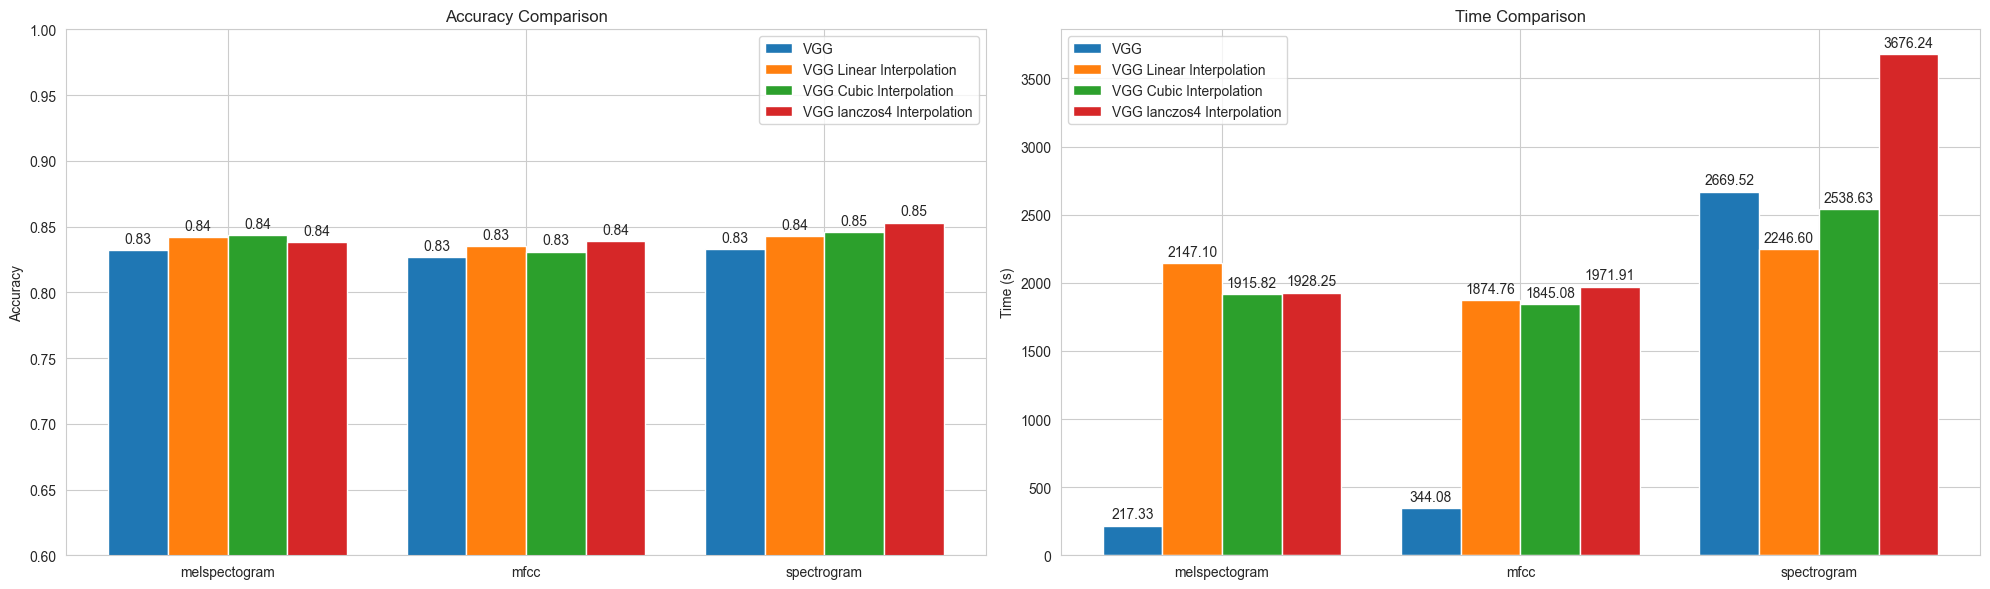

,VGG Accuracy,VGG Time,VGG Linear Interpolation Accuracy,VGG Linear Interpolation Time,VGG Cubic Interpolation Accuracy,VGG Cubic Interpolation Time,VGG lanczos4 Interpolation Accuracy,VGG lanczos4 Interpolation Time
Method,,,,,,,,
melspectogram,0.832,217.334246,0.842,2147.097865,0.8435,1915.815558,0.8385,1928.248177
mfcc,0.827,344.084423,0.835,1874.762041,0.8310,1845.079262,0.8390,1971.912467
spectrogram,0.833,2669.522105,0.843,2246.598897,0.8455,2538.633382,0.8530,3676.242871


None


In [150]:
import pickle
def load_from_pickle(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

VGG_results = load_from_pickle("results_VGG.pickle")
VGG_results_interpolate_mel = load_from_pickle("melspectogramresults_VGG_interpolate_linear.pickle")
VGG_results_interpolate_mfcc = load_from_pickle("mfccresults_VGG_interpolate_linear.pickle")
VGG_results_interpolate_spectrogram = load_from_pickle("spectrogramresults_VGG_interpolate_linear.pickle")
VGG_results_interpolate ={
    'melspectogram': VGG_results_interpolate_mel,
    'mfcc': VGG_results_interpolate_mfcc,
    'spectrogram':VGG_results_interpolate_spectrogram
}
VGG_results_interpolate_cubic = load_from_pickle("results_VGG_interpolate_cubic.pickle")
VGG_results_interpolate_lanczos4 = load_from_pickle("results_VGG_interpolate_lanczos4.pickle")

results_VGG = create_results(VGG_results,"VGG")
results_VGG_linear_interpolation =create_results(VGG_results_interpolate,"VGG Linear Interpolation")
results_VGG_cubic_interpolation =create_results(VGG_results_interpolate_cubic,"VGG Cubic Interpolation")
results_VGG_lanczos4_interpolation =create_results(VGG_results_interpolate_lanczos4,"VGG lanczos4 Interpolation")

plot_accuracy_and_time([results_VGG,results_VGG_linear_interpolation,results_VGG_cubic_interpolation,results_VGG_lanczos4_interpolation],["VGG","VGG Linear Interpolation","VGG Cubic Interpolation","VGG lanczos4 Interpolation"])
print(display(HTML(create_comparison_table([results_VGG,results_VGG_linear_interpolation,results_VGG_cubic_interpolation,results_VGG_lanczos4_interpolation],["VGG","VGG Linear Interpolation","VGG Cubic Interpolation","VGG lanczos4 Interpolation"]).to_html())))

# Resnet vs Resnet Interpolation comparison

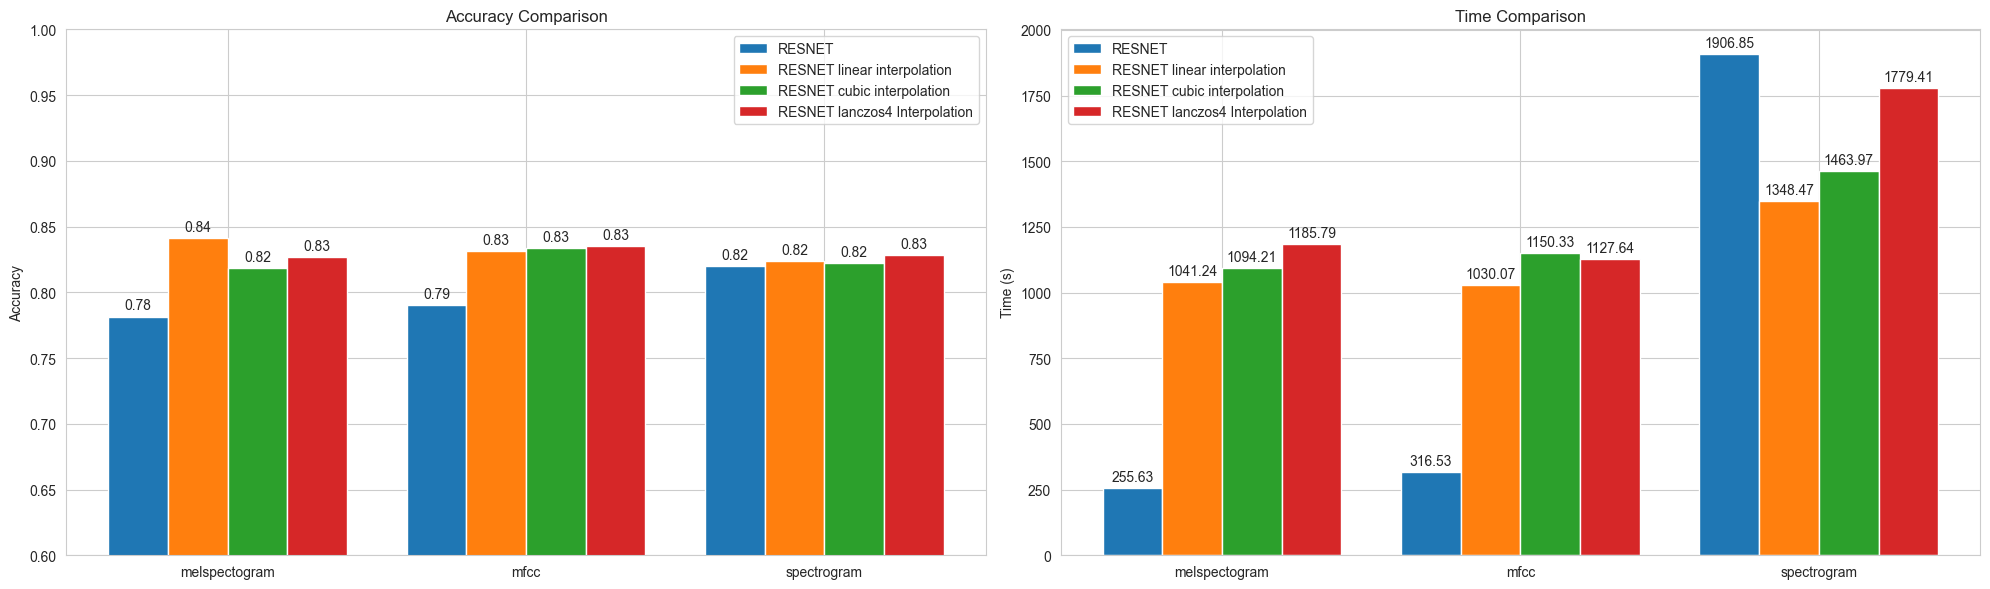

,RESNET Accuracy,RESNET Time,RESNET Linear Interpolation Accuracy,RESNET Linear Interpolation Time,RESNET Cubic Interpolation Accuracy,RESNET Cubic Interpolation Time,RESNET lanczos4 Interpolation Accuracy,RESNET lanczos4 Interpolation Time
Method,,,,,,,,
melspectogram,0.7815,255.626604,0.8410,1041.241980,0.8185,1094.205565,0.827,1185.785264
mfcc,0.7900,316.527282,0.8315,1030.074944,0.8335,1150.333129,0.835,1127.643084
spectrogram,0.8200,1906.850330,0.8240,1348.468669,0.8220,1463.973217,0.828,1779.413349


None


In [151]:

RESNET_results = load_from_pickle("results_resnet.pickle")
RESNET_results_interpolate = load_from_pickle("results_resnet_interpolate_linear.pickle")
RESNET_results_interpolate_cubic = load_from_pickle("results_resnet_interpolate_cubic.pickle")
RESNET_results_interpolate_lanczos4 = load_from_pickle("results_resnet_interpolate_lanczos4.pickle")

results_RESNET = create_results(RESNET_results,"RESNET")
results_RESNET_linear_interpolation =create_results(RESNET_results_interpolate,"RESNET Linear Interpolation")
results_RESNET_cubic_interpolation =create_results(RESNET_results_interpolate_cubic,"RESNET Cubic Interpolation")
results_RESNET_lanczos4_interpolation =create_results(RESNET_results_interpolate_lanczos4,"RESNET lanczos4 Interpolation")

plot_accuracy_and_time([results_RESNET, results_RESNET_linear_interpolation, results_RESNET_cubic_interpolation,results_RESNET_lanczos4_interpolation], ['RESNET', 'RESNET linear interpolation','RESNET cubic interpolation','RESNET lanczos4 Interpolation'])
print(display(HTML(create_comparison_table([results_RESNET,results_RESNET_linear_interpolation,results_RESNET_cubic_interpolation,results_RESNET_lanczos4_interpolation],["RESNET","RESNET Linear Interpolation","RESNET Cubic Interpolation","RESNET lanczos4 Interpolation"]).to_html())))

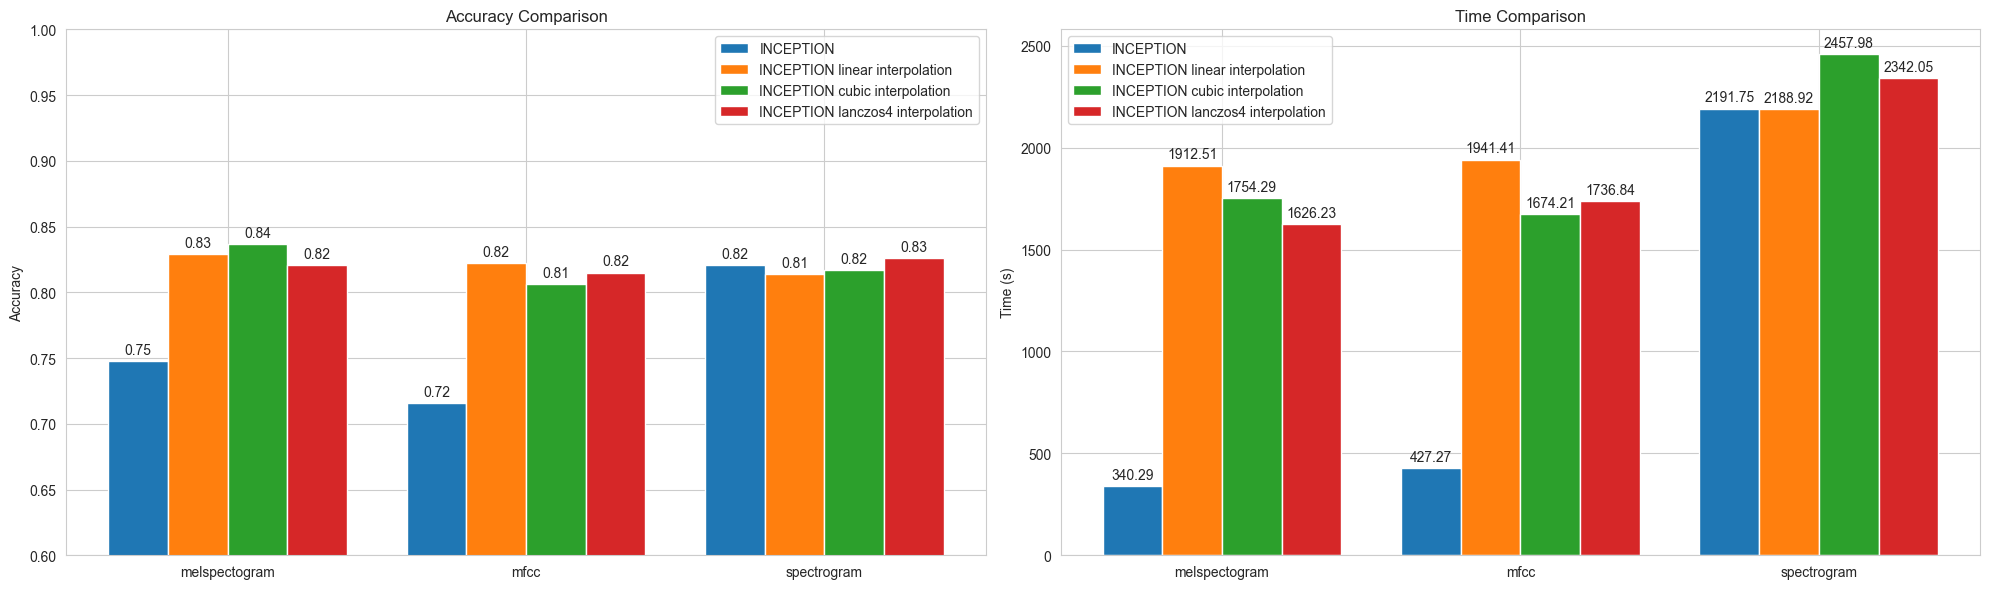

,INCEPTION Accuracy,INCEPTION Time,INCEPTION linear interpolation Accuracy,INCEPTION linear interpolation Time,INCEPTION cubic interpolation Accuracy,INCEPTION cubic interpolation Time
Method,,,,,,
melspectogram,0.7475,340.290101,0.8290,1912.507463,0.8365,1754.292016
mfcc,0.7155,427.273173,0.8225,1941.405233,0.8060,1674.206758
spectrogram,0.8210,2191.746684,0.8140,2188.922462,0.8170,2457.983502


None


In [152]:
INCEPTION_results = load_from_pickle("results_Inception.pickle")
INCEPTION_results_interpolate = load_from_pickle("results_dense_interpolate_linear.pickle")
INCEPTION_results_interpolate_cubic = load_from_pickle("results_dense_interpolate_cubic.pickle")
INCEPTION_results_interpolate_lanczos4 = load_from_pickle("results_dense_interpolate_lanczos4.pickle")

results_INCEPTION = create_results(INCEPTION_results,"INCEPTION")
results_INCEPTION_linear_interpolation =create_results(INCEPTION_results_interpolate,"INCEPTION Linear Interpolation")
results_INCEPTION_cubic_interpolation =create_results(INCEPTION_results_interpolate_cubic,"INCEPTION Cubic Interpolation")
results_INCEPTION_lanczos4_interpolation =create_results(INCEPTION_results_interpolate_lanczos4,"INCEPTION lanczos4 Interpolation")

plot_accuracy_and_time([results_INCEPTION, results_INCEPTION_linear_interpolation,results_INCEPTION_cubic_interpolation, results_INCEPTION_lanczos4_interpolation], ['INCEPTION', 'INCEPTION linear interpolation','INCEPTION cubic interpolation','INCEPTION lanczos4 interpolation'])
print(display(HTML(create_comparison_table([results_INCEPTION, results_INCEPTION_linear_interpolation,results_INCEPTION_cubic_interpolation], ['INCEPTION', 'INCEPTION linear interpolation','INCEPTION cubic interpolation']).to_html())))

# Linear Interpolation

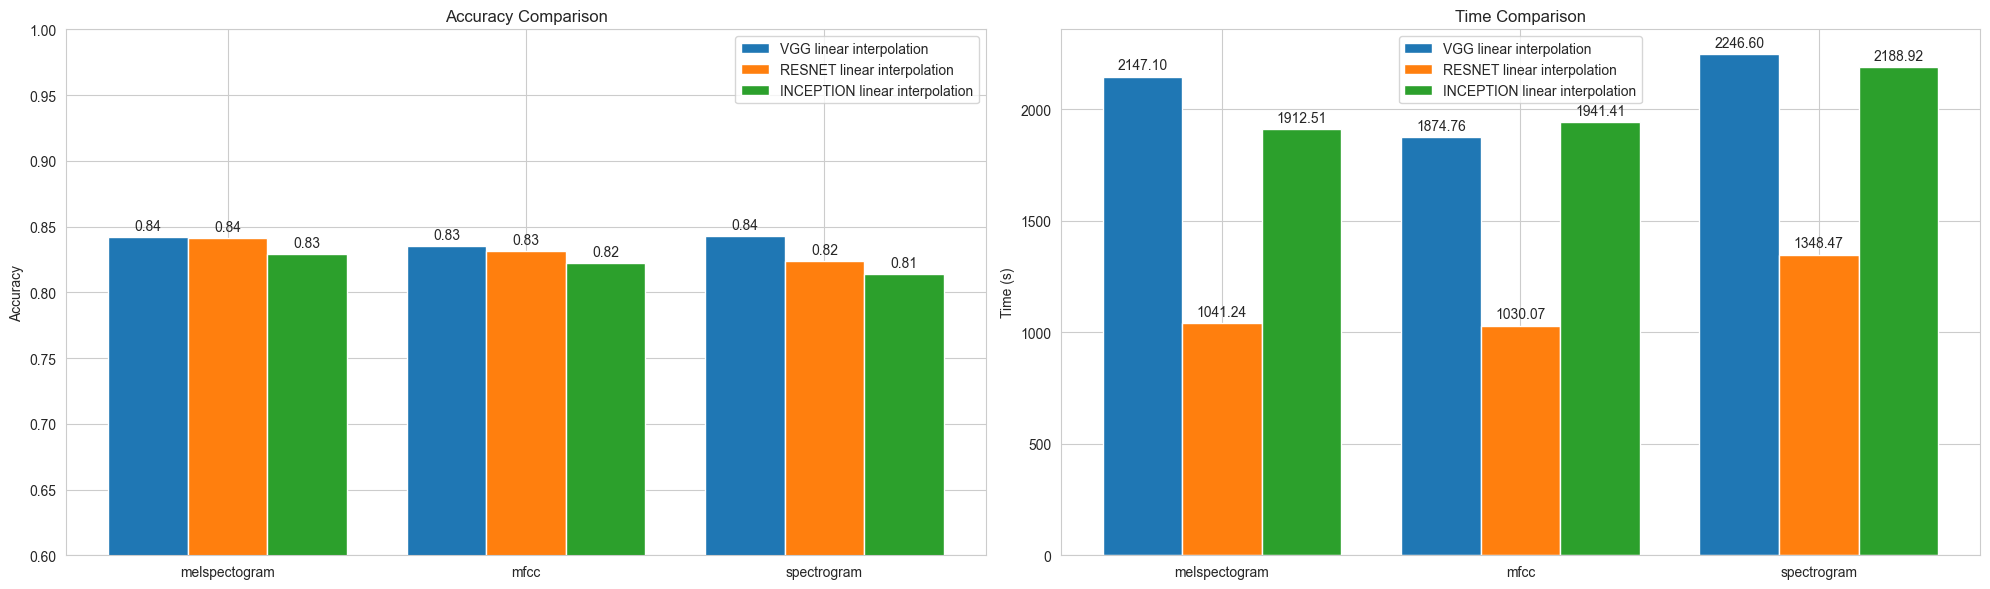

,VGG linear interpolation Accuracy,VGG linear interpolation Time,RESNET linear interpolation Accuracy,RESNET linear interpolation Time,INCEPTION linear interpolation Accuracy,INCEPTION linear interpolation Time
Method,,,,,,
melspectogram,0.842,2147.097865,0.8410,1041.241980,0.8290,1912.507463
mfcc,0.835,1874.762041,0.8315,1030.074944,0.8225,1941.405233
spectrogram,0.843,2246.598897,0.8240,1348.468669,0.8140,2188.922462


None


In [153]:
plot_accuracy_and_time([results_VGG_linear_interpolation, results_RESNET_linear_interpolation, results_INCEPTION_linear_interpolation], ['VGG linear interpolation', 'RESNET linear interpolation','INCEPTION linear interpolation'])
print(display(HTML(create_comparison_table([results_VGG_linear_interpolation, results_RESNET_linear_interpolation, results_INCEPTION_linear_interpolation], ['VGG linear interpolation', 'RESNET linear interpolation','INCEPTION linear interpolation']).to_html())))


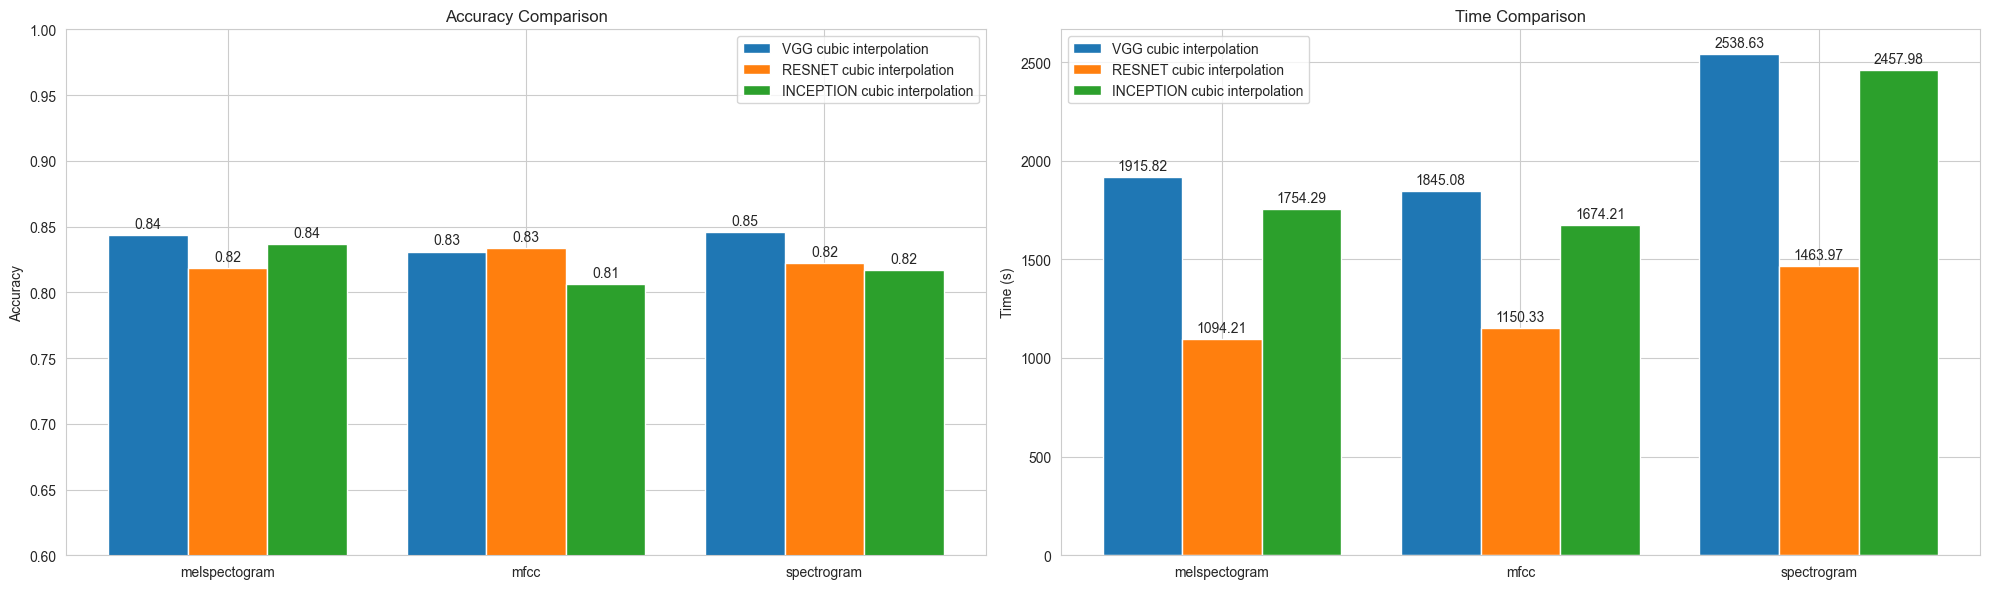

,VGG cubic interpolation Accuracy,VGG cubic interpolation Time,RESNET cubic interpolation Accuracy,RESNET cubic interpolation Time,INCEPTION cubic interpolation Accuracy,INCEPTION cubic interpolation Time
Method,,,,,,
melspectogram,0.8435,1915.815558,0.8185,1094.205565,0.8365,1754.292016
mfcc,0.8310,1845.079262,0.8335,1150.333129,0.8060,1674.206758
spectrogram,0.8455,2538.633382,0.8220,1463.973217,0.8170,2457.983502


None


In [154]:
plot_accuracy_and_time([results_VGG_cubic_interpolation, results_RESNET_cubic_interpolation, results_INCEPTION_cubic_interpolation], ['VGG cubic interpolation', 'RESNET cubic interpolation','INCEPTION cubic interpolation'])
print(display(HTML(create_comparison_table([results_VGG_cubic_interpolation, results_RESNET_cubic_interpolation, results_INCEPTION_cubic_interpolation], ['VGG cubic interpolation', 'RESNET cubic interpolation','INCEPTION cubic interpolation']).to_html())))

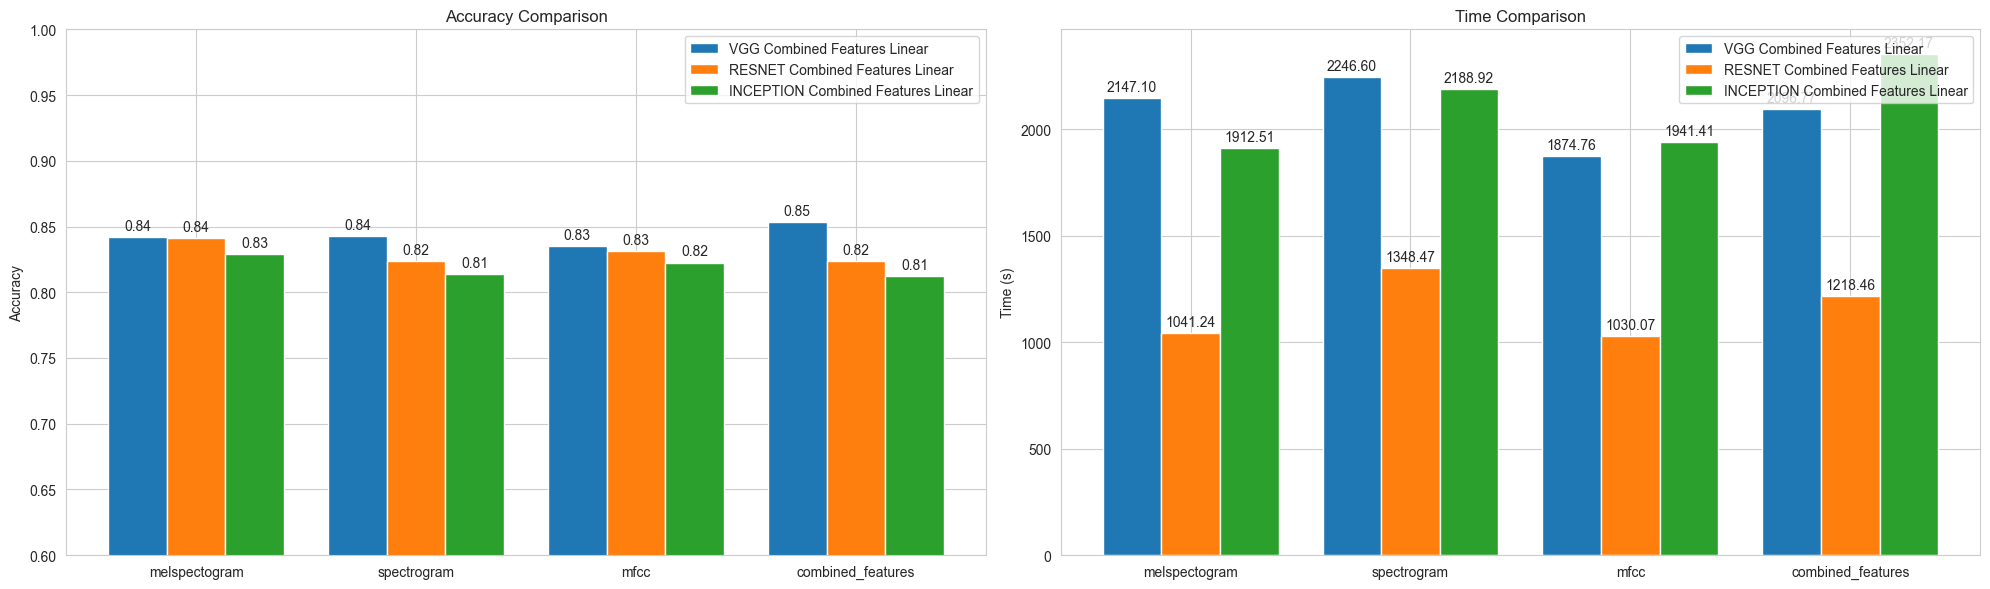

,VGG Combined Features Linear Accuracy,VGG Combined Features Linear Time,RESNET Combined Features Linear Accuracy,RESNET Combined Features Linear Time,INCEPTION Combined Features Linear Accuracy,INCEPTION Combined Features Linear Time
Method,,,,,,
melspectogram,0.8420,2147.097865,0.8410,1041.241980,0.8290,1912.507463
spectrogram,0.8430,2246.598897,0.8240,1348.468669,0.8140,2188.922462
mfcc,0.8350,1874.762041,0.8315,1030.074944,0.8225,1941.405233
combined_features,0.8535,2096.772125,0.8235,1218.457594,0.8120,2352.172251


None


In [155]:
VGG_combined_results_linear = load_from_pickle("results_VGG_interpolate_linear_combined.pickle")
VGG_combined_results_linear_dict = {
    "melspectogram": VGG_results_interpolate["melspectogram"],
    "spectrogram": VGG_results_interpolate["spectrogram"],
    "mfcc": VGG_results_interpolate["mfcc"],
    "combined_features": VGG_combined_results_linear
}
RESNET_combined_results_linear = load_from_pickle("results_resnet_interpolate_linear_combined.pickle")
RESNET_combined_results_linear_dict = {
    "melspectogram": RESNET_results_interpolate["melspectogram"],
    "spectrogram": RESNET_results_interpolate["spectrogram"],
    "mfcc": RESNET_results_interpolate["mfcc"],
    "combined_features": RESNET_combined_results_linear
}

INCEPTION_combined_results_linear = load_from_pickle("results_dense_interpolate_linear_combined.pickle")
INCEPTION_combined_results_linear_dict = {
    "melspectogram": INCEPTION_results_interpolate["melspectogram"],
    "spectrogram": INCEPTION_results_interpolate["spectrogram"],
    "mfcc": INCEPTION_results_interpolate["mfcc"],
    "combined_features": INCEPTION_combined_results_linear
}
results_VGG_combined_results_linear = create_results(VGG_combined_results_linear_dict,"VGG Combined Features Linear")
results_RESNET_combined_results_linear = create_results(RESNET_combined_results_linear_dict,"RESNET Combined Features Linear")
results_INCEPTION_combined_results_linear = create_results(INCEPTION_combined_results_linear_dict,"INCEPTION Combined Features Linear")

plot_accuracy_and_time([results_VGG_combined_results_linear,results_RESNET_combined_results_linear,results_INCEPTION_combined_results_linear], ['VGG Combined Features Linear','RESNET Combined Features Linear','INCEPTION Combined Features Linear'])
print(display(HTML(create_comparison_table([results_VGG_combined_results_linear,results_RESNET_combined_results_linear,results_INCEPTION_combined_results_linear], ['VGG Combined Features Linear','RESNET Combined Features Linear','INCEPTION Combined Features Linear']).to_html())))